# Parameter estimation for DES model

## Peter Kennedy, 2092220, Cardiff University, MAT021, 14 Dec 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime

## Analysis of arrivalScheduled.csv data

In [2]:
arrSched = pd.read_csv('arrivalScheduled.csv')
arrSched = arrSched.rename(columns={"Number of cars": "Cars"})

arrSched.head()

,Date,Day,Cars
0,01/01/19,Tuesday,4
1,02/01/19,Wednesday,3
2,03/01/19,Thursday,4
3,04/01/19,Friday,2
4,05/01/19,Saturday,4


(array([ 93.,   0.,   0.,   0.,   0., 186.,   0.,   0.,   0.,  86.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

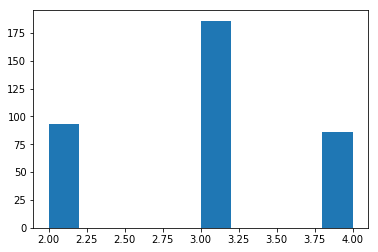

In [3]:
plt.hist(arrSched.Cars)

In [4]:
# Average (mean) of batch size of scheduled arrivals per day
arrSched.Cars.mean()

2.9808219178082194

In [17]:
# Standard deviation of batch size of scheduled arrivals per day
arrSched.Cars.std()

0.7009917492277086

## Analysis of arrivalUnscheduled.csv data

In [70]:
arrUnsched = pd.read_csv('arrivalUnscheduled.csv')

arrUnsched.head()

,UnscheduledArrivals
0,01/01/2019 00:00
1,02/01/2019 16:00
2,04/01/2019 22:00
3,06/01/2019 20:00
4,08/01/2019 18:00


In [134]:
#Calculation of individual inter arrival times for unscheduled arrivals (in days)

delta_bucket = []

for unsched_date in range(len(arrUnsched) - 1):
    date_time_str_this = arrUnsched.iloc[unsched_date][0]
    date_time_obj_this = datetime.datetime.strptime(date_time_str_this, '%d/%m/%Y %H:%M')
    date_time_str_next = arrUnsched.iloc[unsched_date + 1][0]
    date_time_obj_next = datetime.datetime.strptime(date_time_str_next, '%d/%m/%Y %H:%M')
    delta = date_time_obj_next.timestamp() - date_time_obj_this.timestamp()
    delta_bucket.append(delta/(60*60*24))
    

In [137]:
np_delta_bucket = np.array(delta_bucket)
np_delta_bucket

array([1.66666667, 2.25      , 1.91666667, 1.91666667, 2.04166667,
       2.875     , 1.20833333, 1.66666667, 1.875     , 1.25      ,
       2.29166667, 1.375     , 1.83333333, 1.58333333, 1.66666667,
       1.41666667, 1.70833333, 2.33333333, 2.5       , 1.83333333,
       2.125     , 2.04166667, 2.41666667, 1.79166667, 1.70833333,
       1.625     , 1.66666667, 1.79166667, 1.95833333, 1.95833333,
       2.33333333, 1.70833333, 2.41666667, 2.08333333, 1.83333333,
       2.41666667, 2.08333333, 1.75      , 2.29166667, 1.79166667,
       1.79166667, 2.29166667, 1.70833333, 2.25      , 1.83333333,
       1.95833333, 2.16666667, 1.95833333, 1.75      , 2.20833333,
       2.        , 2.625     , 2.08333333, 2.625     , 2.        ,
       2.20833333, 2.41666667, 2.08333333, 2.08333333, 1.79166667,
       1.625     , 2.        , 1.70833333, 2.20833333, 1.70833333,
       2.04166667, 2.5       , 2.16666667, 1.625     , 1.625     ,
       2.20833333, 1.95833333, 2.16666667, 1.375     , 1.54166

(array([ 2.,  5., 18., 39., 44., 25., 31., 15.,  2.,  2.]),
 array([1.20833333, 1.375     , 1.54166667, 1.70833333, 1.875     ,
        2.04166667, 2.20833333, 2.375     , 2.54166667, 2.70833333,
        2.875     ]),
 <a list of 10 Patch objects>)

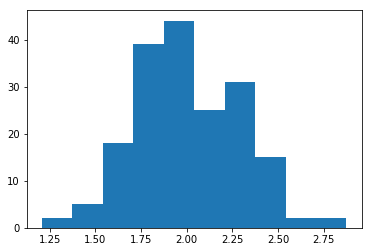

In [122]:
plt.hist(np_delta_bucket)

In [125]:
# Average (mean) inter-arrival time of unscheduled arrivals (in days)
np_delta_bucket.mean()

1.994307832422586

In [138]:
# Standard deviation of inter-arrival time of unscheduled arrivals (in days)
np_delta_bucket.std()

0.28791143409948605

## Analysis of serviceScheduled.csv data

In [11]:
servSched = pd.read_csv('serviceScheduled.csv')
servSched.head()

,timeinhours
0,2.031513
1,1.984567
2,1.937508
3,1.501078
4,1.728006


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8921c16128>]],
      dtype=object)

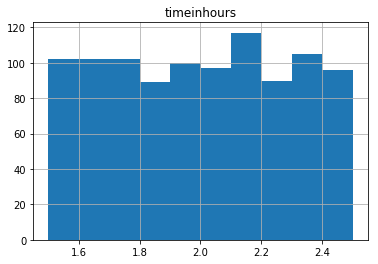

In [12]:
servSched.hist()

In [15]:
# Average (mean) time spent repairing scheduled cars (in days)
servSched.mean()/24

timeinhours    0.083295
dtype: float64

In [13]:
# Minimum time spent repairing scheduled cars (in days)
servSched.min()/24

timeinhours    0.062545
dtype: float64

In [181]:
# Maximum time spent repairing scheduled cars (in days)
servSched.max()/24

timeinhours    0.104154
dtype: float64

## Analysis of serviceUnscheduled.csv data

In [6]:
servUnsched = pd.read_csv('serviceUnscheduled.csv')
servUnsched.head()

,timeinhours
0,0.858453
1,8.519445
2,0.581225
3,7.671357
4,0.847853


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8921bc8358>]],
      dtype=object)

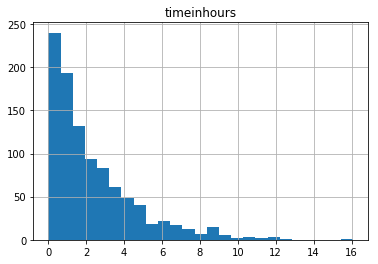

In [8]:
(servUnsched).hist(bins=25)

In [10]:
# Average (mean) time spent repairing unscheduled cars (in days)
servUnsched.mean()/24

timeinhours    0.097373
dtype: float64

In [16]:
# Minimum time spent repairing unscheduled cars (in days)
servUnsched.min()/24

timeinhours    0.000192
dtype: float64

In [9]:
# Maximum time spent repairing unscheduled cars (in days)
servUnsched.max()/24

timeinhours    0.669448
dtype: float64

## Analysis of mechlog.csv data

In [21]:
mechLog = pd.read_csv('mechlog.csv')
mechLog.head()

,time_in,time_out,label,wait_time,time_with_mech,other
0,1.00000,1.08902,1,0.00000,0.08902,0
1,1.08902,1.16664,1,0.08902,0.07762,0
2,1.16664,1.25010,1,0.16664,0.08346,0
3,2.00000,2.07255,1,0.00000,0.07255,0
4,2.07255,2.17137,1,0.07255,0.09882,0


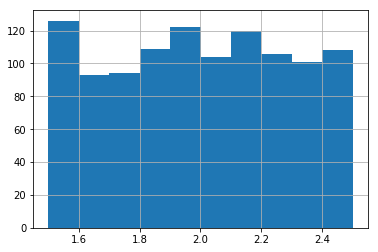

In [23]:
(mechLog[mechLog['label'] == 1]['time_with_mech']*24).hist()

In [51]:
# Average (mean) time that scheduled vehicles were worked on by the mechanic (in hours)
sum(mechLog[mechLog['label'] == 1]['time_with_mech'])/len(mechLog[mechLog['label'] == 1])*24

1.999183157894735

In [55]:
# Minimum time that scheduled vehicles were worked on by the mechanic (in hours)
mechLog[mechLog['label'] == 1]['time_with_mech'].min()*24

1.5002399999999998

In [56]:
# Maximum time that scheduled vehicles were worked on by the mechanic (in hours)
mechLog[mechLog['label'] == 1]['time_with_mech'].max()*24

2.50056

## Analysis of schedtime.csv data

In [18]:
schedTime = pd.read_csv('schedtime.csv')
schedTime.head()

,UniqueID,Time
0,2,0.08902
1,3,0.16664
2,4,0.25010
3,5,0.07255
4,6,0.17137


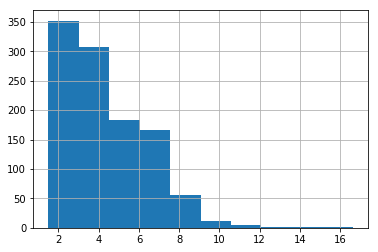

In [24]:
(schedTime['Time']*24).hist()

In [63]:
# Average (mean) time that scheduled vehicles spend in the garage (in hours)
(sum(schedTime['Time'])/len(schedTime))*24

4.28933229916897

In [68]:
# Minimum time that scheduled vehicles spend in the garage (in hours)
(schedTime['Time'].min())*24

1.5002399999999998

In [69]:
# Maximum time that scheduled vehicles spend in the garage (in hours)
(schedTime['Time'].max())*24

16.6248